Install necessary libraries

In [ ]:
!pip install -q ultralytics opencv-python matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.2 MB/s eta 0:00:00


Unzip the dataset

In [ ]:
import zipfile
import os

zip_path = "/content/archive (2).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/shelf_dataset")
dataset_dir = "/content/shelf_dataset"
for root, dirs, files in os.walk(dataset_dir):
    print(root, len(files), "files")
    break

/content/shelf_dataset 0 files


Parse XML Annotations

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    data = []
    filename = root.find('filename').text
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        data.append({
            "filename": filename,
            "class": name,
            "xmin": xmin,
            "ymin": ymin,
            "xmax": xmax,
            "ymax": ymax
        })
    return data

Point to annotations

In [ ]:
annotation_dir = dataset_dir + "/dataset/annotations/test/"
annotations = []

for file in os.listdir(annotation_dir):
    if file.endswith(".xml"):
        file_path = os.path.join(annotation_dir, file)
        annotations.extend(parse_voc_annotation(file_path))

annotations_df = pd.DataFrame(annotations)
annotations_df.head()

,filename,class,xmin,ymin,xmax,ymax
0,IMG20210518191522,chitato,138,185,305,303
1,IMG20210518191522,indomie,157,275,229,394
2,IMG20210518191522,aqua,306,246,395,407
3,IMG20210518191522,tissue,303,96,419,279
4,IMG20210518191522,indomie,222,309,323,419


Analyze Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Count totals
total_images = annotations_df['filename'].nunique()
total_annotations = len(annotations_df)

In [ ]:
# Class count
class_counts = annotations_df['class'].value_counts()

In [ ]:
# Bounding box stats
annotations_df['width'] = annotations_df['xmax'] - annotations_df['xmin']
annotations_df['height'] = annotations_df['ymax'] - annotations_df['ymin']
bbox_stats = annotations_df[['width', 'height']].describe()

<ipython-input-9-7fbce0ec89d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


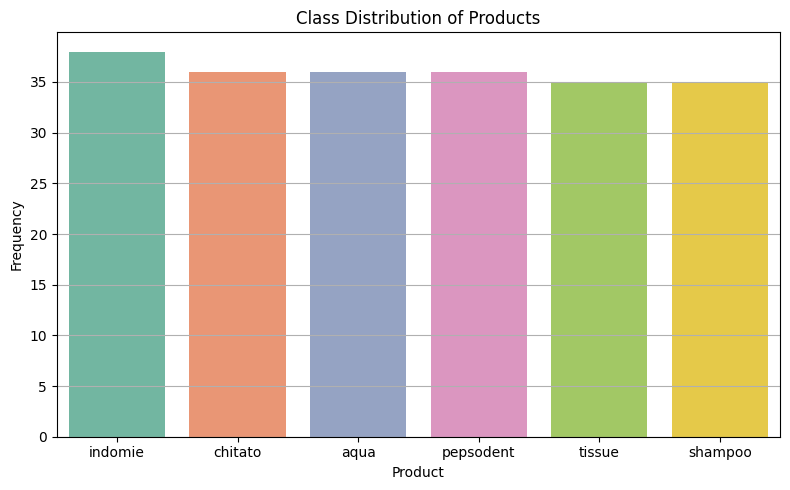

In [ ]:
# Plot class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title("Class Distribution of Products")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

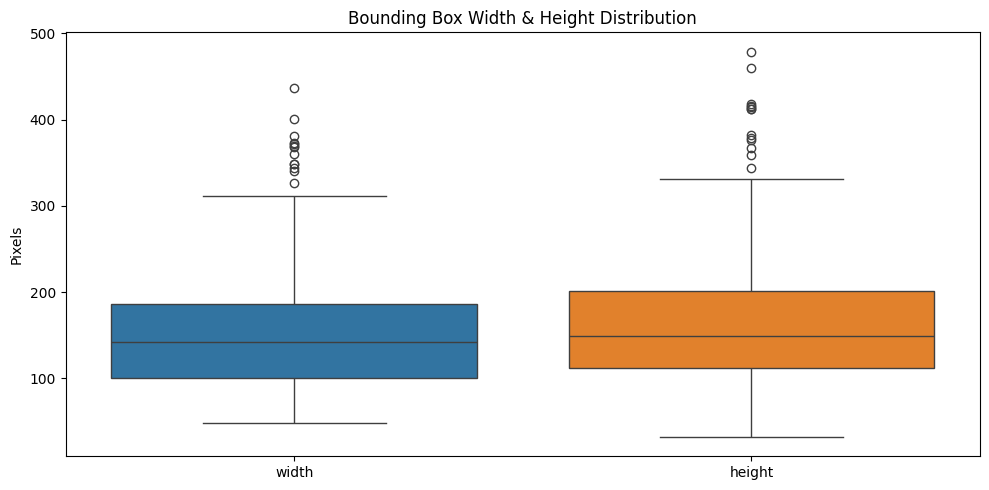

In [ ]:
# Plot bbox size distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=annotations_df[['width', 'height']])
plt.title("Bounding Box Width & Height Distribution")
plt.ylabel("Pixels")
plt.tight_layout()
plt.show()

In [ ]:
# Print summary
print(f" Total Images: {total_images}")
print(f" Total Annotations: {total_annotations}")
print("\n Class Breakdown:\n", class_counts)
print("\n BBox Size Summary:\n", bbox_stats)

 Total Images: 86
 Total Annotations: 216

 Class Breakdown:
 class
indomie      38
chitato      36
aqua         36
pepsodent    36
tissue       35
shampoo      35
Name: count, dtype: int64

 BBox Size Summary:
             width      height
count  216.000000  216.000000
mean   156.370370  169.287037
std     77.442323   85.237567
min     48.000000   32.000000
25%    100.750000  111.750000
50%    142.000000  149.000000
75%    186.000000  201.000000
max    437.000000  479.000000


Show a random sample image

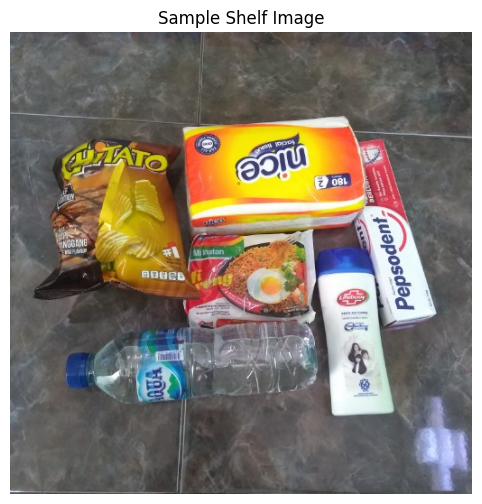

In [ ]:
import cv2
import random

image_files = []
for root, _, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, file))

if len(image_files) == 0:
    print("No image files found.")
else:
    img_path = random.choice(image_files)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title("Sample Shelf Image")
    plt.axis("off")
    plt.show()


Run Pretrained YOLO Detection


image 1/1 /content/shelf_dataset/dataset/images/train/mix (29).jpg: 640x640 2 bottles, 1 sandwich, 560.1ms
Speed: 5.2ms preprocess, 560.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


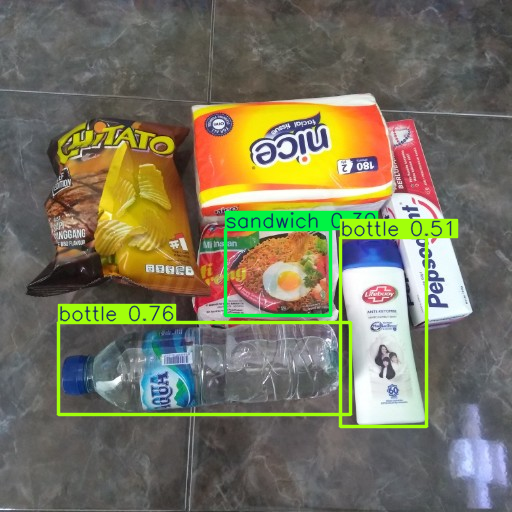

In [ ]:
from ultralytics import YOLO

# Load pre-trained model
model = YOLO('yolov5su.pt')

# Predict
results = model(img_path)

res = results[0]
res.show()


Convert detections to a pandas dataframe

In [ ]:
df = res.to_df()  # bounding boxes in x1, y1, x2, y2 format

print(df.head())

       name  class  confidence  \
0    bottle     39     0.75900   
1    bottle     39     0.50870   
2  sandwich     48     0.29766   

                                                 box  
0  {'x1': 58.37134, 'y1': 322.60504, 'x2': 350.63...  
1  {'x1': 340.1127, 'y1': 237.97725, 'x2': 426.07...  
2  {'x1': 225.21274, 'y1': 229.53348, 'x2': 330.9...  
